In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, recall_score, f1_score


In [4]:
df = pd.read_csv("Datasets/E-commerce Customer Behavior.csv")

In [5]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [6]:
test = df.sample(12)
test

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
74,175,Female,41,Chicago,Bronze,480.25,9,3.6,True,38,Unsatisfied
271,372,Female,41,Chicago,Bronze,475.25,9,3.6,True,42,Unsatisfied
318,419,Male,35,Los Angeles,Silver,800.90,12,4.1,False,19,Neutral
328,429,Female,37,Houston,Bronze,430.80,7,3.4,False,31,Neutral
23,124,Female,37,Houston,Bronze,430.80,7,3.4,False,23,Neutral
310,411,Female,36,Houston,Bronze,440.50,8,3.1,False,24,Neutral
285,386,Male,32,Miami,Silver,660.30,10,3.8,True,37,Unsatisfied
185,286,Female,37,Houston,Bronze,430.80,7,3.4,False,23,Neutral
50,151,Female,43,Chicago,Bronze,505.75,10,3.3,True,39,Unsatisfied
129,230,Male,30,San Francisco,Gold,1460.50,20,4.8,False,12,Satisfied


In [7]:
test = test.iloc[:,:-1]
test

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
74,175,Female,41,Chicago,Bronze,480.25,9,3.6,True,38
271,372,Female,41,Chicago,Bronze,475.25,9,3.6,True,42
318,419,Male,35,Los Angeles,Silver,800.90,12,4.1,False,19
328,429,Female,37,Houston,Bronze,430.80,7,3.4,False,31
23,124,Female,37,Houston,Bronze,430.80,7,3.4,False,23
310,411,Female,36,Houston,Bronze,440.50,8,3.1,False,24
285,386,Male,32,Miami,Silver,660.30,10,3.8,True,37
185,286,Female,37,Houston,Bronze,430.80,7,3.4,False,23
50,151,Female,43,Chicago,Bronze,505.75,10,3.3,True,39
129,230,Male,30,San Francisco,Gold,1460.50,20,4.8,False,12


In [8]:
test.to_csv('Datasets/testdata.csv', index = False)

In [9]:
df.shape

(350, 11)

In [10]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [12]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,275.887931,33.577586,847.793103,12.632184,4.023563,26.614943
std,101.304611,4.878024,361.692375,4.146079,0.579145,13.474750
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.750000,30.000000,505.750000,9.000000,3.500000,15.000000
50%,276.500000,32.000000,780.200000,12.000000,4.100000,23.000000
75%,363.250000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
labels = df['Satisfaction Level'].unique()
labels

array(['Satisfied', 'Neutral', 'Unsatisfied'], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11724\3392653493.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Satisfaction Level', palette=['red', 'darkorange', 'green'])


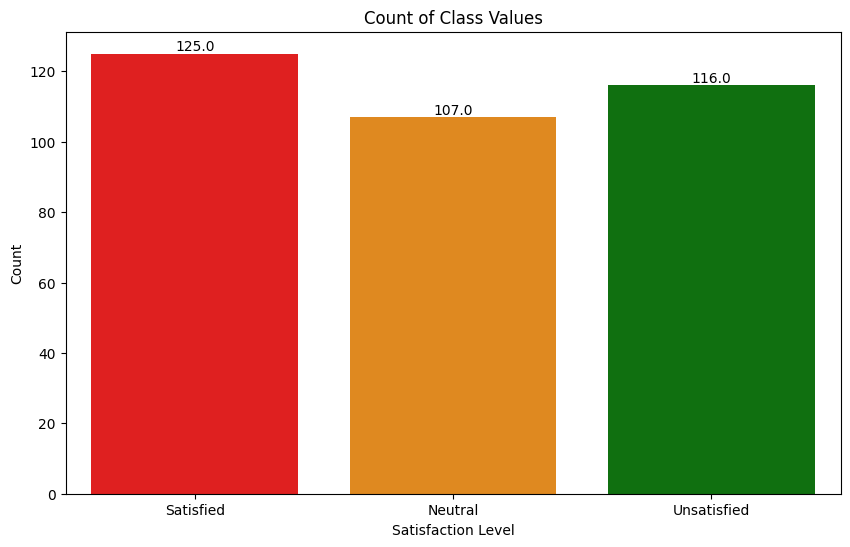

In [28]:
# Create a count plot for the 'Satisfaction Level' column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Satisfaction Level', palette=['red', 'darkorange', 'green'])

plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Count of Class Values')

# Annotate each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [31]:
df.select_dtypes(include=['number']).corr()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
Customer ID,1.000000,0.013900,-0.010860,-0.008469,-0.006173,0.116709
Age,0.013900,1.000000,-0.676826,-0.684397,-0.721752,0.170437
Total Spend,-0.010860,-0.676826,1.000000,0.972276,0.941190,-0.544679
Items Purchased,-0.008469,-0.684397,0.972276,1.000000,0.921396,-0.425425
Average Rating,-0.006173,-0.721752,0.941190,0.921396,1.000000,-0.435921
Days Since Last Purchase,0.116709,0.170437,-0.544679,-0.425425,-0.435921,1.000000


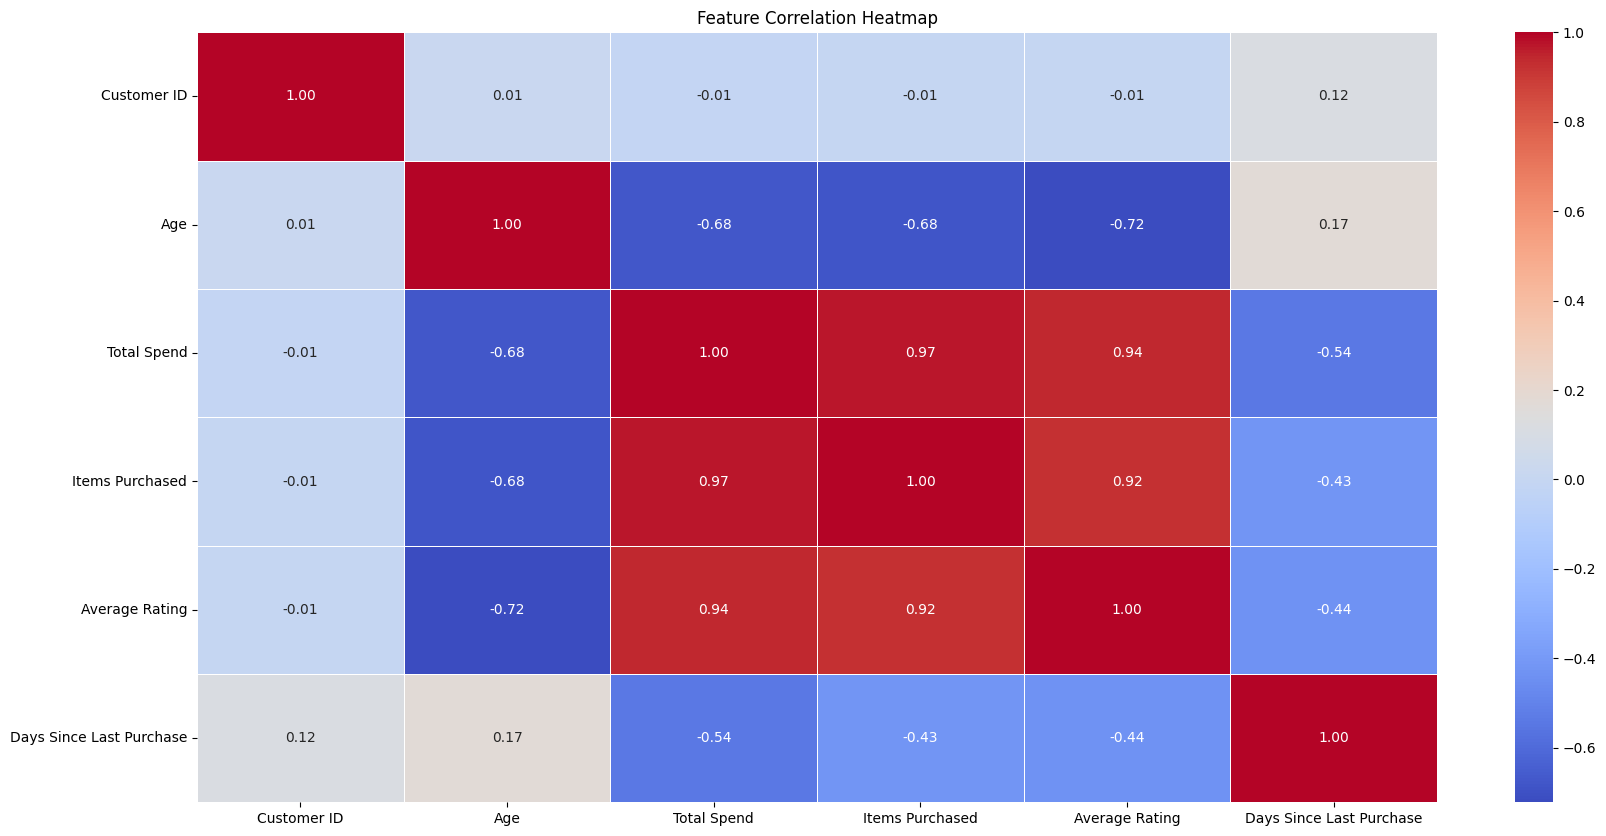

In [35]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [36]:
object_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [37]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,True,25,1
1,102,1,34,2,2,780.50,11,4.1,False,18,0
2,103,0,43,0,0,510.75,9,3.4,True,42,2
3,104,1,30,5,1,1480.30,19,4.7,False,12,1
4,105,1,27,3,2,720.40,13,4.0,True,55,2
...,...,...,...,...,...,...,...,...,...,...,...
345,446,1,32,3,2,660.30,10,3.8,True,42,2
346,447,0,36,1,0,470.50,8,3.0,False,27,0
347,448,0,30,4,1,1190.80,16,4.5,True,28,1
348,449,1,34,2,2,780.20,11,4.2,False,21,0


In [38]:
X = df.drop(['Customer ID', 'Satisfaction Level'], axis = 1)
X

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,0,29,4,1,1120.20,14,4.6,True,25
1,1,34,2,2,780.50,11,4.1,False,18
2,0,43,0,0,510.75,9,3.4,True,42
3,1,30,5,1,1480.30,19,4.7,False,12
4,1,27,3,2,720.40,13,4.0,True,55
...,...,...,...,...,...,...,...,...,...
345,1,32,3,2,660.30,10,3.8,True,42
346,0,36,1,0,470.50,8,3.0,False,27
347,0,30,4,1,1190.80,16,4.5,True,28
348,1,34,2,2,780.20,11,4.2,False,21


In [39]:
y = df['Satisfaction Level']
y

0      1
1      0
2      2
3      1
4      2
      ..
345    2
346    0
347    1
348    0
349    2
Name: Satisfaction Level, Length: 348, dtype: int64

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=77 )

In [41]:
X_train.shape

(278, 9)

In [42]:
X_test.shape

(70, 9)

In [43]:
labels = ['Satisfied', 'Neutral', 'Unsatisfied']
labels

['Satisfied', 'Neutral', 'Unsatisfied']

In [44]:
precision = []
recall = []
fscore = []
accuracy = []

In [45]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, testY,predict):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 

    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

Logistic Regression model saved successfully.
Logistic Regression Accuracy    : 98.57142857142858
Logistic Regression Precision   : 98.66666666666667
Logistic Regression Recall      : 98.61111111111111
Logistic Regression FSCORE      : 98.61050803300043

 Logistic Regression classification report
               precision    recall  f1-score   support

   Satisfied       1.00      0.96      0.98        25
     Neutral       0.96      1.00      0.98        23
 Unsatisfied       1.00      1.00      1.00        22

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



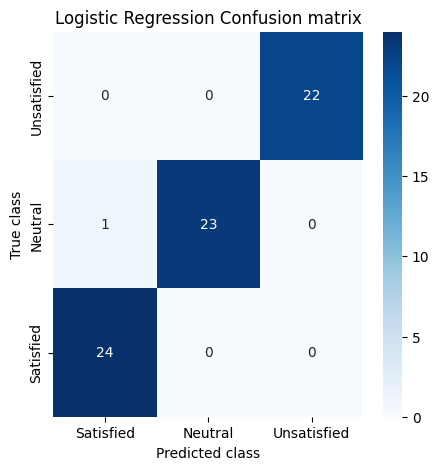

In [47]:
from sklearn.linear_model import LogisticRegression
import joblib
import os

# Ensure model directory exists
os.makedirs("model", exist_ok=True)

if os.path.exists("model/LogisticRegression.pkl"):
    lr = joblib.load("model/LogisticRegression.pkl")
    print("Logistic Regression model loaded successfully.")
else:
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    joblib.dump(lr, "model/LogisticRegression.pkl")
    print("Logistic Regression model saved successfully.")

predict = lr.predict(X_test)
calculateMetrics("Logistic Regression", predict, y_test)


SVC model saved successfully.
SVC Accuracy    : 60.0
SVC Precision   : 62.31884057971014
SVC Recall      : 48.0
SVC FSCORE      : 51.37812230835487

 SVC classification report
               precision    recall  f1-score   support

   Satisfied       0.00      0.00      0.00        25
     Neutral       1.00      0.87      0.93        23
 Unsatisfied       0.44      1.00      0.61        22

    accuracy                           0.60        70
   macro avg       0.48      0.62      0.51        70
weighted avg       0.47      0.60      0.50        70



c:\Users\Admin\Downloads\A7 E-Commerce Customer Behaviour\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Downloads\A7 E-Commerce Customer Behaviour\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\Downloads\A7 E-Commerce Customer Behaviour\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

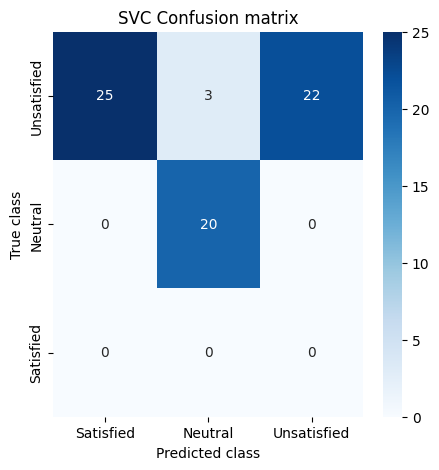

In [48]:
from sklearn.svm import SVC
import joblib
import os

if os.path.exists('model/svc.pkl'):
    lr = joblib.load('model/svc.pkl')
    print("SVC model loaded successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("SVC", predict, y_test)
else:
    lr = SVC()
    lr.fit(X_train, y_train)
    joblib.dump(lr, 'model/svc.pkl')
    print("SVC model saved successfully.")
    predict = lr.predict(X_test)
    calculateMetrics("SVC", predict, y_test)


In [49]:
test = pd.read_csv('Datasets/testdata.csv')
test

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,175,Female,41,Chicago,Bronze,480.25,9,3.6,True,38
1,372,Female,41,Chicago,Bronze,475.25,9,3.6,True,42
2,419,Male,35,Los Angeles,Silver,800.90,12,4.1,False,19
3,429,Female,37,Houston,Bronze,430.80,7,3.4,False,31
4,124,Female,37,Houston,Bronze,430.80,7,3.4,False,23
5,411,Female,36,Houston,Bronze,440.50,8,3.1,False,24
6,386,Male,32,Miami,Silver,660.30,10,3.8,True,37
7,286,Female,37,Houston,Bronze,430.80,7,3.4,False,23
8,151,Female,43,Chicago,Bronze,505.75,10,3.3,True,39
9,230,Male,30,San Francisco,Gold,1460.50,20,4.8,False,12


In [50]:
object_cols = test.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in object_cols:
    test[col] = label_encoder.fit_transform(test[col].astype(str))

In [51]:
test = test.drop(['Customer ID'], axis = 1)
test

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,0,41,0,0,480.25,9,3.6,True,38
1,0,41,0,0,475.25,9,3.6,True,42
2,1,35,2,2,800.90,12,4.1,False,19
3,0,37,1,0,430.80,7,3.4,False,31
4,0,37,1,0,430.80,7,3.4,False,23
5,0,36,1,0,440.50,8,3.1,False,24
6,1,32,3,2,660.30,10,3.8,True,37
7,0,37,1,0,430.80,7,3.4,False,23
8,0,43,0,0,505.75,10,3.3,True,39
9,1,30,4,1,1460.50,20,4.8,False,12


In [52]:
predict = lr.predict(test)
predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2])

In [53]:
test['predication'] = [labels[pred] for pred in predict]
test

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,predication
0,0,41,0,0,480.25,9,3.6,True,38,Unsatisfied
1,0,41,0,0,475.25,9,3.6,True,42,Unsatisfied
2,1,35,2,2,800.90,12,4.1,False,19,Unsatisfied
3,0,37,1,0,430.80,7,3.4,False,31,Unsatisfied
4,0,37,1,0,430.80,7,3.4,False,23,Unsatisfied
5,0,36,1,0,440.50,8,3.1,False,24,Unsatisfied
6,1,32,3,2,660.30,10,3.8,True,37,Unsatisfied
7,0,37,1,0,430.80,7,3.4,False,23,Unsatisfied
8,0,43,0,0,505.75,10,3.3,True,39,Unsatisfied
9,1,30,4,1,1460.50,20,4.8,False,12,Neutral
